In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv(r'Label_CT_Scan.csv')

In [28]:
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,adenocarcinoma
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,adenocarcinoma
2,0,8,11,9,17,6,7,11,1,14,...,0,0,0,0,0,0,0,0,0,adenocarcinoma
3,0,0,1,3,5,7,4,6,6,5,...,15,0,0,0,0,0,0,0,0,adenocarcinoma
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,adenocarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,squamous.cell.carcinoma
1348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,squamous.cell.carcinoma
1349,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,squamous.cell.carcinoma
1350,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,squamous.cell.carcinoma


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
df['Label']=le.fit_transform(df["Label"])

In [31]:
from sklearn.model_selection import train_test_split
x=df.drop('Label',axis=1)
y=df['Label']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [32]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

In [33]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)


In [34]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_gb=gb.predict(x_test)

In [35]:
sv=SVC()
sv.fit(x_train,y_train)
y_pred_sv=sv.predict(x_test)

In [36]:
lgb=LGBMClassifier()
lgb.fit(x_train,y_train)
y_pred_lgb=lgb.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.246180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1107013
[LightGBM] [Info] Number of data points in the train set: 1081, number of used features: 10000
[LightGBM] [Info] Start training from score -1.372514
[LightGBM] [Info] Start training from score -1.428814
[LightGBM] [Info] Start training from score -1.361624
[LightGBM] [Info] Start training from score -1.383523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [37]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)

In [38]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

C:\Users\rnkha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

[0.9003690036900369, 0.8856088560885609, 0.9261992619926199, 0.9188191881918819, 0.8966789667896679, 0.8892988929889298, 0.8007380073800738]


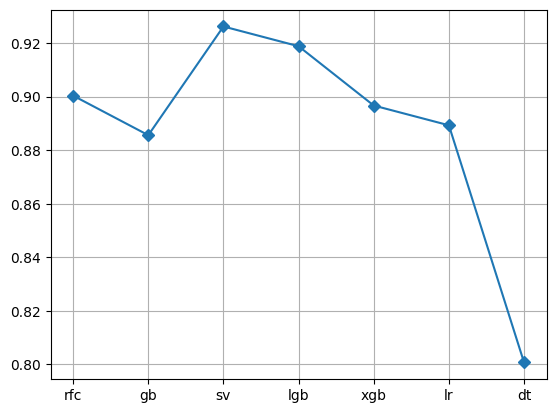

In [51]:
from sklearn.metrics import accuracy_score
models=['rfc','gb','sv','lgb','xgb','lr','dt']
acs=[]
ac=[y_pred_rfc,y_pred_gb,y_pred_sv,y_pred_lgb,y_pred_xgb,y_pred_lr,y_pred_dt]
for i in ac:
    acs.append(accuracy_score(y_test,i))
print(acs)
plt.plot(models,acs,marker='D')
plt.grid()
plt.show()

In [52]:
import joblib
joblib.dump(sv,'model.pt')

['model.pt']